In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('weatherHistory.csv', parse_dates = ['Formatted Date'] , index_col = ['Formatted Date'])

In [3]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
df1 = df.dropna()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  int64  
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Daily Summary             95936 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 8.1+ MB


In [6]:
df1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
df1.index = pd.to_datetime(df1.index ,utc =True)

In [8]:
resampled_data = df1.resample('M').mean()

In [9]:
resampled_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914
2006-03-31 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694


In [10]:
resampled_data['month'] = resampled_data.index.month

In [11]:
resampled_data['year'] = resampled_data.index.year

In [12]:
resampled_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,year
Formatted Date,,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000,12,2005
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960,1,2006
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914,2,2006
2006-03-31 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263,3,2006
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694,4,2006


In [13]:
resampled_data.index = resampled_data.index.date
resampled_data = resampled_data[1:] # remove column with year 2005 column
resampled_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,year
2006-01-31,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,1021.204960,1,2006
2006-02-28,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,995.183914,2,2006
2006-03-31,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,976.436263,3,2006
2006-04-30,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,1013.493694,4,2006
2006-05-31,15.650732,15.539479,0.721801,10.174161,209.310484,11.748066,1016.629785,5,2006


In [14]:
# now we have to find avg apparent tempreature for month to month like april 2006 to april 2016
month_to_month_AT = {}
for month in range(1,13):
    month_to_month_AT[month] = list(resampled_data[resampled_data['month'] == month]['Apparent Temperature (C)'].values)

In [15]:
title = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
         10:'Oct',11:'Nov',12:'Dec'}
def plot_AT_or_Humidity(what_for , month_dict):
    for index in range(1,13):
        t = title[index]
        plt.plot(range(2006,2017),month_dict[index])
        plt.title(what_for + ' for ' +t+' Month')
        plt.show()

In [16]:
# now we have to find avg apparent tempreature for month to month like april 2006 to april 2016
month_to_month_Humidity = {}
for month in range(1,13):
    month_to_month_Humidity[month] = list(resampled_data[resampled_data['month'] == month]['Humidity'].values)

In [17]:
# now we find difference
def find_avg_difference(month_dict):
    difference = []
    for month in range(1,13):
        difference.append(np.mean(month_dict[month]))
    return difference

In [18]:
AT_difference_monthly = find_avg_difference(month_to_month_AT)
Humidity_difference_monthly = find_avg_difference(month_to_month_Humidity)

Text(0.5, 1.0, 'Monthly Average Data(2006-2016) of AT')

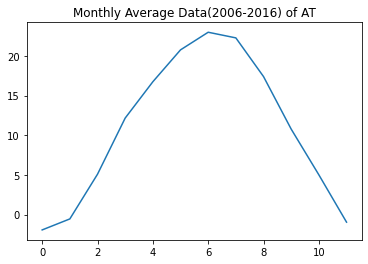

In [19]:
plt.plot(AT_difference_monthly)
plt.title('Monthly Average Data(2006-2016) of AT')

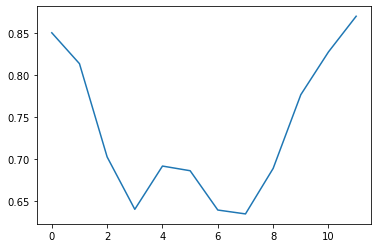

In [20]:
plt.plot(Humidity_difference_monthly)
